### MediaPipe mit Hand key points

hier nur Handerkennung:

In [1]:
import cv2
import mediapipe as mp
import pyautogui
import psutil 

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Öffne die Kamera
cap = cv2.VideoCapture(0)

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # # Prüfen, ob der Zeigefinger gestreckt ist
            # landmarks = hand_landmarks.landmark
            # if finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP):
            #     pyautogui.press('right')  # Nächste Folie in PowerPoint

    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


c:\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


hier mit bild vergrößern, bild verkleinern und rehctsklick. Dafür muss kamera offen sein und ein Fenster / bild in dem die Befehle ausgeführt werden sollen. Man muss ich das fenster klicken, indem die Befehle ausgeführt werden sollen, dann funktioniert es

In [8]:
import cv2
import mediapipe as mp
import pyautogui
import psutil 

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands  # Mediapipe Hand-Modul initialisieren
hands = mp_hands.Hands()  # Hand-Erkennung instanziieren
mp_drawing = mp.solutions.drawing_utils  # Zeichen-Utilities von Mediapipe initialisieren

# Öffne die Kamera
cap = cv2.VideoCapture(0)  # Zugriff auf die Webcam (Kamera 0)

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y  # Prüfen, ob die Y-Koordinate der Fingerkuppe kleiner (höher) ist als die des Fingergelenks

while cap.isOpened():
    ret, frame = cap.read()  # Liest ein Bild von der Kamera
    if not ret:
        break  # Wenn kein Bild gelesen werden kann, Schleife beenden

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Konvertiere das Bild von BGR zu RGB (Mediapipe benötigt RGB)
    image.flags.writeable = False  # Bild als nicht schreibbar markieren, um Performance zu verbessern
    results = hands.process(image)  # Verarbeite das Bild mit Mediapipe Hand-Modul
    image.flags.writeable = True  # Bild wieder als schreibbar markieren
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Konvertiere das Bild zurück zu BGR für OpenCV

    if results.multi_hand_landmarks:
        # Wenn Handlandmarken erkannt wurden
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)  # Zeichne Handlandmarken auf das Bild

            # Prüfen, ob der Zeigefinger gestreckt ist
            landmarks = hand_landmarks.landmark
            if finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP):
                pyautogui.press('right')  # Simuliere das Drücken der "Rechts"-Taste (nächste Folie in PowerPoint)

    cv2.imshow('Hand Gesture Recognition', image)  # Zeige das Bild im Fenster

    if cv2.waitKey(5) & 0xFF == 27:
        break  # Beende die Schleife, wenn die ESC-Taste gedrückt wird

cap.release()  # Kamera freigeben
cv2.destroyAllWindows()  # Alle OpenCV-Fenster schließen


Graveyard:

In [9]:
import cv2
import mediapipe as mp
import pyautogui

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Öffne die Kamera
cap = cv2.VideoCapture(0)

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Prüfen der Fingerzustände
            landmarks = hand_landmarks.landmark
            index_finger_up = finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP)
            middle_finger_up = finger_up(landmarks, mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_DIP)
            pinky_finger_up = finger_up(landmarks, mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_DIP)
            
            if index_finger_up and middle_finger_up and not pinky_finger_up:
                pyautogui.hotkey('ctrl', '+')  # Vergrößern des Bildes (z.B. in einem Browser oder Bildbetrachter)
            elif pinky_finger_up and not index_finger_up and not middle_finger_up:
                pyautogui.hotkey('ctrl', '-')  # Verkleinern des Bildes (z.B. in einem Browser oder Bildbetrachter)
            elif index_finger_up and not middle_finger_up:
                pyautogui.press('right')  # Nächste Folie in PowerPoint

    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import mediapipe as mp
import pyautogui

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Öffne die Kamera
cap = cv2.VideoCapture(0)

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Prüfen der Fingerzustände
            landmarks = hand_landmarks.landmark
            index_finger_up = finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP)
            middle_finger_up = finger_up(landmarks, mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_DIP)
            pinky_finger_up = finger_up(landmarks, mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_DIP)
            thumb_up = finger_up(landmarks, mp_hands.HandLandmark.THUMB_TIP, mp_hands.HandLandmark.THUMB_IP)
            
            if thumb_up:
                # Wenn der Daumen gestreckt ist, zeige "Thumbs up" oben rechts im Bild
                cv2.putText(image, 'Thumbs up', (image.shape[1] - 150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            if index_finger_up and middle_finger_up and not pinky_finger_up:
                pyautogui.hotkey('ctrl', '+')  # Vergrößern des Bildes (z.B. in einem Browser oder Bildbetrachter)
            elif pinky_finger_up and not index_finger_up and not middle_finger_up:
                pyautogui.hotkey('ctrl', '-')  # Verkleinern des Bildes (z.B. in einem Browser oder Bildbetrachter)
            elif index_finger_up and not middle_finger_up:
                pyautogui.press('right')  # Nächste Folie in PowerPoint

    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [4]:
import cv2
import mediapipe as mp
import pyautogui
import subprocess
import os
import psutil

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Öffne die Kamera
cap = cv2.VideoCapture(0)

# Pfad zu deinem Word-Dokument
word_document_path = r'C:\\Users\\schul\\Desktop\\Darmstadt\\Dokument.docx'

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Prüfen, ob der Zeigefinger gestreckt ist
            landmarks = hand_landmarks.landmark
            if finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP):
                # Überprüfen, ob das Dokument bereits geöffnet ist
                if not any(word_document_path in p.cmdline() for p in psutil.process_iter()):
                    subprocess.Popen(['start', word_document_path], shell=True)

    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [29]:
import cv2
import mediapipe as mp
import pyautogui
import psutil 

# Initialisiere Mediapipe Hand-Modul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Öffne die Kamera
cap = cv2.VideoCapture(0)

def finger_up(landmarks, finger_tip, finger_dip):
    """Prüfe, ob der Finger gestreckt ist"""
    return landmarks[finger_tip].y < landmarks[finger_dip].y

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Bild von BGR zu RGB konvertieren
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Prüfen, ob der Zeigefinger gestreckt ist
            landmarks = hand_landmarks.landmark
            if finger_up(landmarks, mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_DIP):
                pyautogui.press('right')  # Nächste Folie in PowerPoint

    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [23]:
import cv2
import mediapipe as mp
import pyautogui

# Initialisiere MediaPipe Handmodul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

# Initialisiere die Webcam
cap = cv2.VideoCapture(0)

def detect_gesture(hand_landmarks):
    # Überprüfe, ob der Zeigefinger gestreckt ist
    if hand_landmarks:
        landmarks = hand_landmarks[0].landmark

        # Koordinaten des Zeigefingers
        index_finger_tip = landmarks[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        index_finger_mcp = landmarks[mp_hands.HandLandmark.INDEX_FINGER_MCP]

        # Wenn der Zeigefinger gestreckt ist
        if index_finger_tip.y < index_finger_mcp.y:
            return True
    return False

while cap.isOpened():
    success, image = cap.read()
    if not success:
        break

    # Bildeingaben umkehren und als RGB formatieren
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Erkenne die Hand im Bild
    results = hands.process(image)

    # Bildeingaben wieder schreibbar machen und zurück zu BGR konvertieren
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Zeichne Handlandmarks
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Erkenne die Geste
        if detect_gesture(results.multi_hand_landmarks):
            pyautogui.press('right')  # PowerPoint weiter

    # Zeige das Bild
    cv2.imshow('Hand Gesture Recognition', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break

# Beende die Webcam und schließe die Fenster
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


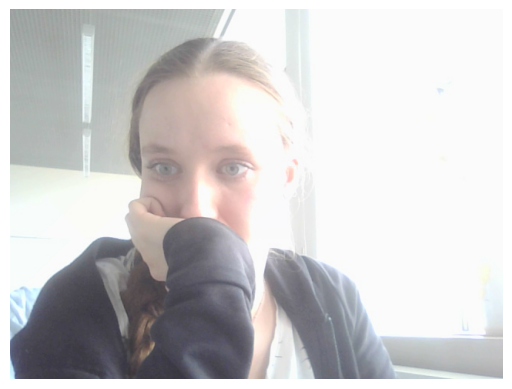

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [33]:
import cv2
import mediapipe as mp
import pyautogui
import matplotlib.pyplot as plt

# Initialisiere MediaPipe Handmodul
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

# Initialisiere die Webcam
cap = cv2.VideoCapture(0)

def detect_gesture(hand_landmarks):
    if hand_landmarks:
        landmarks = hand_landmarks[0].landmark

        index_finger_tip = landmarks[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        index_finger_mcp = landmarks[mp_hands.HandLandmark.INDEX_FINGER_MCP]

        if index_finger_tip.y < index_finger_mcp.y:
            return True
    return False

while cap.isOpened():
    success, image = cap.read()
    if not success:
        break

    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        if detect_gesture(results.multi_hand_landmarks):
            pyautogui.press('right')

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.001)
    plt.close()

    if cv2.waitKey(5) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()
